## Use AIC to decide whether or not to include $\Delta C_{p}$ in model

In [ ]:
%matplotlib inline
import pytc

### Our results depend on our confidence in our measured heats.  

Origin does not return an uncertainty, so we have to estimate the uncertainty ourselves.  This can be done by setting a constant uncertainty each measured for the experiment.  The value of `HEAT_UNCERTAINTY` below lets us select between being able to resolve $\Delta C_{p}$ (`HEAT_UNCERTAINTY = 0.1`) or not (`HEAT_UNCERTAINTY = 1.0`). 

In [10]:
HEAT_UNCERTAINTY = 0.1 #cal/mol; Favors dCp
#HEAT_UNCERTAINTY = 1.0 #cal/mol; Favors no dCp

#### Fit to the VantHoff global connector to extract van't Hoff Enthalpy
Titrations of recombinant human S100A14 with $ZnCl_{2}$ at $5$, $10$, $17$, $25$, $30$ and $35 ^{\circ}C$.  Concentrations were: $[protein] = 110\ \mu M$ and $[ZnCl_{2}]=200\ mM$.  Buffer was $25\ mM$ Trizma, $100\ mM$ NaCl, $pH\ 7.4$.  Buffer was treated with chelex and filtered to $0.22\ \mu m$.  Data collected using a GE ITC200. 

# Fit successful? True
# 2017-05-16 08:59:50.293275
# Units: cal/mol
# Fit type: maximum likelihood
# AIC: 1587.1297287737498
# AICc: 1597.3297287737498
# BIC: 1624.8370700007833
# F: 1666.0899786430912
# Rsq: 0.9975242429326632
# Rsq_adjusted: 0.99692526944863
# df: 63
# ln(L): -777.5648643868749
# num_obs: 78
# num_param: 15
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,g_competent,NA,1.47190e+00,1.18175e-02,1.44827e+00,1.49552e+00,False,1.00000e+00,5.00000e-01,1.50000e+00
global,vh_K_ref,NA,9.05917e+03,2.64020e+02,8.53140e+03,9.58693e+03,False,1.00000e+04,1.00000e+00,inf
global,vh_dH_vanthoff,NA,-6.23432e+03,1.28138e+02,-6.49046e+03,-5.97818e+03,False,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/5C.DH,1.18810e+04,1.46899e+03,8.94449e+03,1.48174e+04,False,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/5C.DH,-7.42379e+00,5.86259e-01,-8.59570e+00,-6.25187e+00,False,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependenc

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


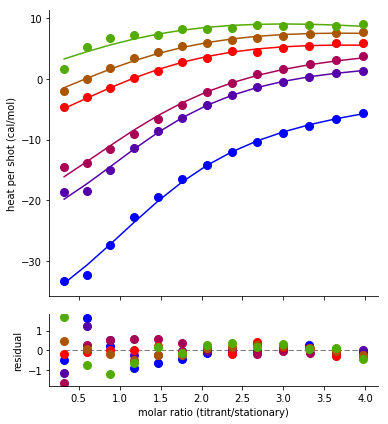

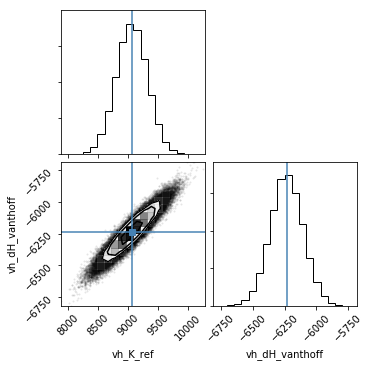

In [11]:
import numpy as np

# --------------------------------------------------------------------
# Create a global fitting instance
g1 = pytc.GlobalFit()
vh = pytc.global_connectors.VantHoff("vh")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t5)
g1.link_to_global(t5,"dH",vh.dH)
g1.link_to_global(t5,"K",vh.K)
g1.link_to_global(t5,"fx_competent","g_competent")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t10)
g1.link_to_global(t10,"dH",vh.dH)
g1.link_to_global(t10,"K",vh.K)
g1.link_to_global(t10,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t17 = pytc.ITCExperiment("temp-dependence/17C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t17)
g1.link_to_global(t17,"dH",vh.dH)
g1.link_to_global(t17,"K",vh.K)
g1.link_to_global(t17,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t25)
g1.link_to_global(t25,"dH",vh.dH)
g1.link_to_global(t25,"K",vh.K)
g1.link_to_global(t25,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t30 = pytc.ITCExperiment("temp-dependence/30C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t30)
g1.link_to_global(t30,"dH",vh.dH)
g1.link_to_global(t30,"K",vh.K)
g1.link_to_global(t30,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t35)
g1.link_to_global(t35,"dH",vh.dH)
g1.link_to_global(t35,"K",vh.K)
g1.link_to_global(t35,"fx_competent","g_competent")

g1.update_bounds("g_competent",(0.5,1.5))
g1.update_bounds("vh_K_ref",(1,np.inf))

# Do fit
g1.fit() 

# Show the results
fit, ax = g1.plot()
c = g1.corner_plot()
print(g1.fit_as_csv)

#### Fit to the VantHoffExtended global connector to extract change in heat capacity (one more param)
Titrations of recombinant human S100A14 with $ZnCl_{2}$ at $5$, $10$, $17$, $25$, $30$ and $35 ^{\circ}C$.  Concentrations were: $[protein] = 110\ \mu M$ and $[ZnCl_{2}]=200\ mM$.  Buffer was $25\ mM$ Trizma, $100\ mM$ NaCl, $pH\ 7.4$.  Buffer was treated with chelex and filtered to $0.22\ \mu m$.  Data collected using a GE ITC200. 

# Fit successful? True
# 2017-05-16 08:59:52.106755
# Units: cal/mol
# Fit type: maximum likelihood
# AIC: 1531.921402323322
# AICc: 1543.5146226623049
# BIC: 1571.985452377045
# F: 1583.9825933734944
# Rsq: 0.9975982289728544
# Rsq_adjusted: 0.9969682562444229
# df: 62
# ln(L): -748.960701161661
# num_obs: 78
# num_param: 16
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,vhe_dH_ref,NA,-3.43555e+03,1.54730e+02,-3.74495e+03,-3.12615e+03,False,0.00000e+00,-inf,inf
global,vhe_dCp,NA,5.60120e+01,2.41306e+00,5.11868e+01,6.08372e+01,False,0.00000e+00,-inf,inf
global,vhe_K_ref,NA,1.76803e+04,1.06627e+03,1.55481e+04,1.98124e+04,False,1.00000e+00,1.00000e+00,inf
global,g_competent,NA,1.30815e+00,1.37882e-02,1.28058e+00,1.33572e+00,False,1.00000e+00,5.00000e-01,1.50000e+00
local,dilution_heat,temp-dependence/5C.DH,2.68360e+04,1.53675e+03,2.37631e+04,2.99090e+04,False,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/5C.DH,-1.40513e+01,6.09725e-0

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


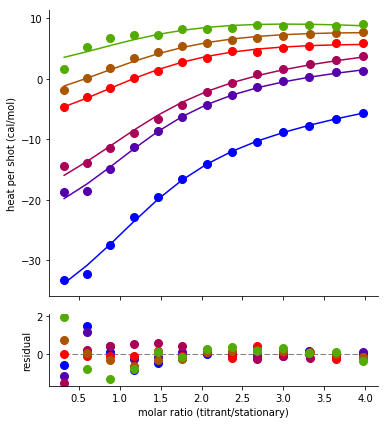

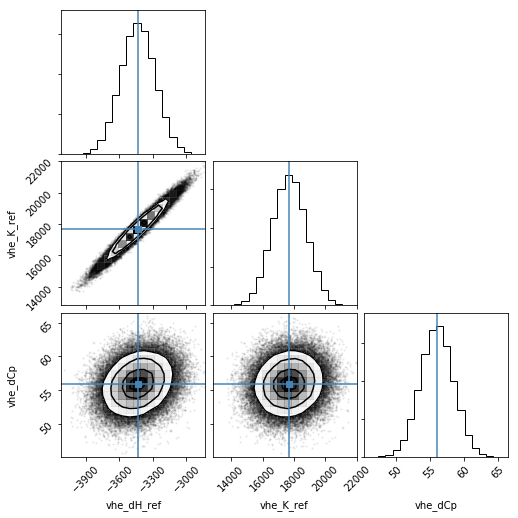

In [12]:
# --------------------------------------------------------------------
# Create a global fitting instance
g2 = pytc.GlobalFit()
vhe = pytc.global_connectors.VantHoffExtended("vhe")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t5)
g2.link_to_global(t5,"dH",vhe.dH)
g2.link_to_global(t5,"K",vhe.K)
g2.link_to_global(t5,"fx_competent","g_competent")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t10)
g2.link_to_global(t10,"dH",vhe.dH)
g2.link_to_global(t10,"K",vhe.K)
g2.link_to_global(t10,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t17 = pytc.ITCExperiment("temp-dependence/17C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t17)
g2.link_to_global(t17,"dH",vhe.dH)
g2.link_to_global(t17,"K",vhe.K)
g2.link_to_global(t17,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t25)
g2.link_to_global(t25,"dH",vhe.dH)
g2.link_to_global(t25,"K",vhe.K)
g2.link_to_global(t25,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t30 = pytc.ITCExperiment("temp-dependence/30C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t30)
g2.link_to_global(t30,"dH",vhe.dH)
g2.link_to_global(t30,"K",vhe.K)
g2.link_to_global(t30,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t35)
g2.link_to_global(t35,"dH",vhe.dH)
g2.link_to_global(t35,"K",vhe.K)
g2.link_to_global(t35,"fx_competent","g_competent")

g2.update_bounds("g_competent",(0.5,1.5))
g2.update_bounds("vhe_K_ref",(1,np.inf))

# Do fit
g2.fit() 

# Show the results
fit, ax = g2.plot()
c = g2.corner_plot()
print(g2.fit_as_csv)


#### Use util.choose_model to select between the two models

In [13]:
pytc.util.compare_models(g1,g2)

{'AIC': (1, array([  1.02722181e-12,   1.00000000e+00])),
 'AICc': (1, array([  2.06157048e-12,   1.00000000e+00])),
 'BIC': (1, array([  3.33746756e-12,   1.00000000e+00]))}